In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

sns.set_style('darkgrid')
sns.color_palette("mako", as_cmap=True)

#Signficance Tests
from scipy.stats import mannwhitneyu
from scipy.stats import kstest
from scipy.stats import chisquare

In [7]:
df = pd.read_csv('..\movieReplicationSet.csv')
df.rename(columns={'Rambo: First Blood Part II': 'Rambo: First Blood Part II (1985)'}, inplace=True)
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
movies = df.iloc[:,0:400]
personal = df.iloc[:,401:]

### QUESTIONS

#### 1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?

In [4]:
ratings = movies.apply(lambda x: len(x.dropna())) #Creates a Series of the amount of ratings that each movie received
med_popularity = ratings.median() #Calculates the median amount of ratings
print('The median popularity of the movies in this dataset is: {} ratings'.format(med_popularity))

The median popularity of the movies in this dataset is: 197.5 ratings


In [5]:
#Lists with titles of popular and unpopular movies (based on the median)
popular_movies_list = ratings[ratings > med_popularity]
unpopular_movies_list = ratings[ratings <= med_popularity] 
print('popular movies length: {}, unpopular movies length: {}'.format(len(popular_movies_list), len(unpopular_movies_list)))

popular movies length: 200, unpopular movies length: 200


In [13]:
# Convert the dataframes into arrays of all rankings
popular_movies = movies[popular_movies_list.index].values.reshape(-1)
unpopular_movies = movies[unpopular_movies_list.index].values.reshape(-1)

#Removes missing values
popular_movies = popular_movies[~np.isnan(popular_movies)]
unpopular_movies = unpopular_movies[~np.isnan(unpopular_movies)]

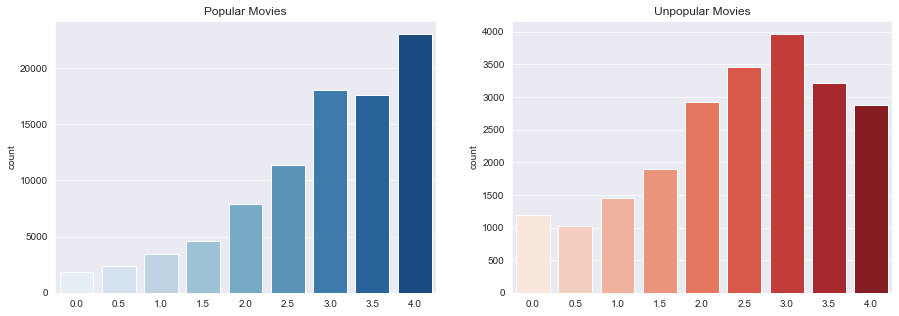

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=popular_movies, palette='Blues')
axes[0].set_title('Popular Movies')
sns.countplot(ax=axes[1], x=unpopular_movies, palette='Reds')
axes[1].set_title('Unpopular Movies')
plt.show()

##### Let's choose a significance test
* Z-test: We don't know the population parameters. <font color='red'>Not appropiate</font> <br>
* T-test: Sample means can't be interpreted meaningfully (psichologically, the distance from 4.5 and a 5 is different from the distance from 0 to 0.5). Additionally, it is not normally distributed <font color='red'>Not appropiate</font><br>
* U-test (Mann-Whitney): We do want to test for differences in medians to check which one is higher <font color='green'>Appropiate</font>  <br>
* KS-test: Not interested in comparing distributions <font color='red'>Incorrect</font> <br>
* $\chi^2$ test: Not interested in the general relationship between the variables <font color='red'>Incorrect</font>

$H_0$: Popular movies are not rated higher than unpopular movies.<br>
$H_1$: Popular movies are rated higher than unpopular movies.

In [16]:
test1 = mannwhitneyu(popular_movies, unpopular_movies, alternative='greater') #Runs a Mann Whitney U-test
if test1.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test1.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test1.pvalue))

We reject the Null Hypothesis (p-value = 0.0)


CONCLUSION: Popular movies are rated **higher** than the unpopular movies.

#### 2) Are movies that are newer rated differently than movies that are older?

In [19]:
titles = movies.columns.tolist() #Creates a list of the titles of all movies
release_year = list(map(lambda x: int(x[-6:].strip('()')), titles)) #Creates a list of the movies' release years
year_median = stat.median(release_year) #Extracts the median of the release years

In [35]:
#Creates two lists of the titles of old and new movies
old_movies_list = [titles[idx] for idx, element in enumerate(release_year) if element < year_median]
new_movies_list = [titles[idx] for idx, element in enumerate(release_year) if element >= year_median]
print('old movies length: {}, new movies length: {}'.format(len(old_movies_list), len(new_movies_list)))

old movies length: 197, new movies length: 203


It is important to note that depending on whether the median year (1999) is assigned to old or new movies makes a considerable difference. If assigned to old movies, the number of old and new movies is 226 and 174, respectively. On the ohter hand, if assigned to the new movies, the distribution of movies is much more even, with 197 old movies and 203 new movies.

In [28]:
#Gets the dataframe subsets of old and new movies
old_movies = movies.loc[:,old_movies_list]
new_movies = movies.loc[:,new_movies_list]

# Convert the dataframes into arrays of all rankings
new_ratings = np.array(new_movies).reshape(-1)
old_ratings = np.array(old_movies).reshape(-1)

#Removes missing values
new_ratings = new_ratings[~np.isnan(new_ratings)]
old_ratings = old_ratings[~np.isnan(old_ratings)]

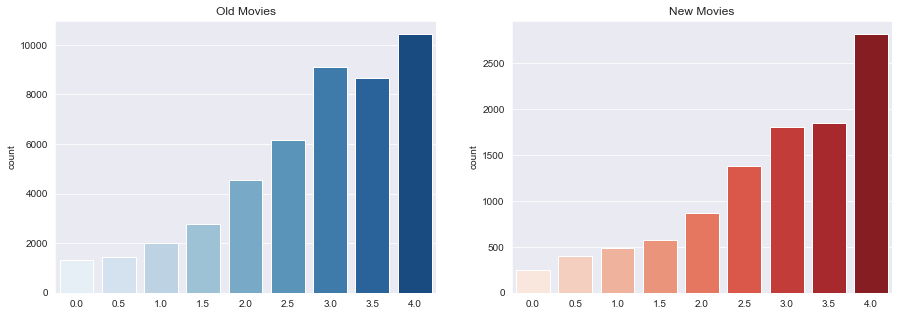

In [139]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=old_ratings, palette='Blues')
axes[0].set_title('Old Movies')
sns.countplot(ax=axes[1], x=new_ratings, palette='Reds')
axes[1].set_title('New Movies')
plt.show()

##### Let's choose a significance test
* Z-test: We don't know the population parameters. <font color='red'>Not appropiate</font> <br>
* T-test: Sample means can't be interpreted meaningfully (psichologically, the distance from 4.5 and a 5 is different from the distance from 0 to 0.5). Additionally, it is not normally distributed <font color='red'>Not appropiate</font><br>
* U-test (Mann-Whitney): We could test for differences in medians even though if the result is that the medians are the same, we could not discard a difference in the underlying distribution <font color='blue'>Slightly Appropiate</font>  <br>
* KS-test: We are interested in comparing the underlying distributions <font color='green'>Appropiate</font> <br>
* $\chi^2$ test: We are interested in the general relationship between the variables and each category has enough samples to use this test but the sample sizes are not the same <font color='red'>Not appropiate</font>

$H_0$: There is no difference between the ranks of new and old movies.<br>
$H_1$: There is a difference between the ranks of new and old movies.

In [40]:
test2 = mannwhitneyu(old_ratings, new_ratings, alternative='two-sided') #Runs a Mann Whitney U-test
if test2.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test2.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test2.pvalue))

We reject the Null Hypothesis (p-value = 1.2849216001533932e-06)


In [41]:
test2 = kstest(old_ratings, new_ratings, alternative='two-sided') #Runs a KS-test
if test2.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test2.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test2.pvalue))

We reject the Null Hypothesis (p-value = 0.002251935928322741)


CONCLUSION: There **is a difference** between the ranks of new and old movies.

#### 3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [58]:
shrek_genders = df.iloc[:,[df.columns.get_loc('Shrek (2001)'),474]].dropna() #Extracts Shrek and gender columns from the df

In [59]:
#Create a dataframe with the ratings of each gender for the Shrek movie
shrek_men = shrek_genders[shrek_genders['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2.0]['Shrek (2001)']
shrek_women = shrek_genders[shrek_genders['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1.0]['Shrek (2001)']
print("Men that have rated Shrek: {}, Women that have rated Shrek: {}".format(len(shrek_men), len(shrek_women)))

Men that have rated Shrek: 241, Women that have rated Shrek: 743


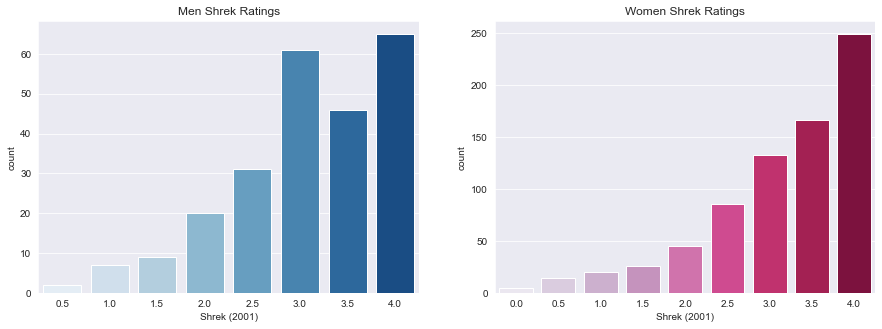

In [140]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=shrek_men, palette='Blues')
axes[0].set_title('Men Shrek Ratings')
sns.countplot(ax=axes[1], x=shrek_women, palette='PuRd')
axes[1].set_title('Women Shrek Ratings')
plt.show()

##### Let's choose a significance test
* Z-test: We don't know the population parameters. <font color='red'>Not appropiate</font> <br>
* T-test: Sample means can't be interpreted meaningfully (psichologically, the distance from 4.5 and a 5 is different from the distance from 0 to 0.5). Additionally, it is not normally distributed <font color='red'>Not appropiate</font><br>
* U-test (Mann-Whitney): We could test for differences in medians even though if the result is that the medians are the same, we could not discard a difference in the underlying distribution <font color='blue'>Slightly Appropiate</font>  <br>
* KS-test: We are interested in comparing the underlying distributions <font color='green'>Appropiate</font> <br>
* $\chi^2$ test: We are interested in the general relationship between the variables and each category has enough samples to use this test but the sample sizes are not the same <font color='red'>Not appropiate</font>

$H_0$: There is no difference between the way men and women rate the movie Shrek.<br>
$H_1$: There is a difference between the way men and women rate the movie Shrek.

In [61]:
test3 = kstest(shrek_men, shrek_women, alternative='two-sided') #Runs a KS-test
if test3.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test3.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test3.pvalue))

We fail to reject the Null Hypothesis (p-value = 0.056082040722863824)


In [62]:
test3 = mannwhitneyu(shrek_men, shrek_women, alternative='two-sided') #Runs a Mann Whitney U-test
if test3.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test3.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test3.pvalue))

We fail to reject the Null Hypothesis (p-value = 0.050536625925559006)


CONCLUSION: There is **no difference** between the way men and women rate the movie Shrek.

#### 4) What proportion of movies are rated differently by male and female viewers?


To answer this question we must loop over all movies, divide it into two samples of male and female viewers and perform a KS-test (and Mannwhitney U-test) to check whether they are statistically different or not. During this loop, we must keep track of the number of movies whose ratings between men and women are indeeed statistically different and output its proportion.

In [6]:
titles = movies.columns.tolist()
significant, significant2 = 0, 0
for title in titles:
    movie_genders = df.iloc[:,[df.columns.get_loc(title),474]].dropna()
    movie_men = movie_genders[movie_genders['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2.0][title]
    movie_women = movie_genders[movie_genders['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1.0][title]
    test4 = kstest(movie_men, movie_women, alternative='two-sided')
    if test4.pvalue < 0.005:
        significant = significant + 1
    test4 = mannwhitneyu(movie_men, movie_women, alternative='two-sided')
    if test4.pvalue < 0.005:
        significant2 = significant2 + 1

print('The proportion of movies rated differently by male and female viewers is {}% (based on KS-test)'
      .format(100 * significant/len(titles))) 
print('The proportion of movies rated differently by male and female viewers is {}% (based on Mann Whitney U-test)'
      .format(100 * significant2/len(titles)))   

The proportion of movies rated differently by male and female viewers is 6.25% (based on KS-test)
The proportion of movies rated differently by male and female viewers is 12.5% (based on Mannwhitney U-test)


#### 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?**

In [68]:
#Extract two series with the ranks for Lion King of users who are only children and users with siblings
siblings = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0.0]['The Lion King (1994)']
only_child = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1.0]['The Lion King (1994)']

In [69]:
print("Ranks of only childs: {}, ranks of users with Siblings: {}".format(len(only_child), len(siblings)))

Ranks of only childs: 177, Ranks of users with Siblings: 894


In [70]:
#Remove missing values
siblings_ratings = np.array(siblings)[~np.isnan(siblings)]
onlychild_ratings = np.array(only_child)[~np.isnan(only_child)]

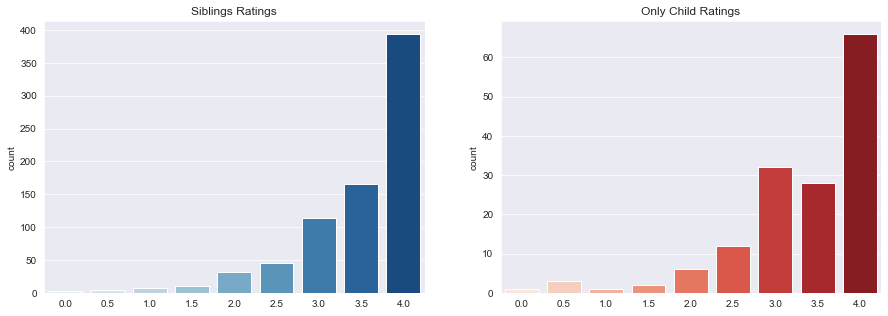

In [141]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=siblings_ratings, palette='Blues')
axes[0].set_title('Siblings Ratings')
sns.countplot(ax=axes[1], x=onlychild_ratings, palette='Reds')
axes[1].set_title('Only Child Ratings')
plt.show()

##### Let's choose a significance test
* Z-test: We don't know the population parameters. <font color='red'>Not appropiate</font> <br>
* T-test: Sample means can't be interpreted meaningfully (psichologically, the distance from 4.5 and a 5 is different from the distance from 0 to 0.5). Additionally, it is not normally distributed <font color='red'>Not appropiate</font><br>
* U-test (Mann-Whitney): We do want to test for differences in medians to check which one is higher <font color='green'>Appropiate</font>  <br>
* KS-test: Not interested in comparing distributions <font color='red'>Incorrect</font> <br>
* $\chi^2$ test: Not interested in the general relationship between the variables <font color='red'>Incorrect</font>

$H_0$: Only child viewers do not enjoy The Lion King more than viewers with siblings. <br>
$H_1$: Only child viewers enjoy The Lion King more than viewers with siblings. 

In [72]:
test5 = mannwhitneyu(onlychild_ratings, siblings_ratings, alternative='greater') #Runs a Mann Whitney U-test
if test5.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test5.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test5.pvalue))

We fail to reject the Null Hypothesis (p-value = 0.978419092554931)


CONCLUSION: Only child viewers **do not enjoy** The Lion King more than viewers with siblings.

#### 6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

To answer this question we must loop over all movies, divide it into two samples of only child viewers and viewers with siblings and perform a KS-test (and Mannwhitney U-test) to check whether they are statistically different or not. During this loop, we must keep track of the number of movies whose ratings between only childs and viewers with siblings are indeeed statistically different and output its proportion.

In [8]:
titles = movies.columns.tolist()
significant, significant2 = 0, 0
for title in titles:
    movie_family = df.iloc[:,[df.columns.get_loc(title),475]].dropna()
    movie_onlychild = movie_family[movie_family['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1][title]
    movie_siblings = movie_family[movie_family['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0][title]
    test6 = kstest(movie_onlychild, movie_siblings, alternative='two-sided')
    if test6.pvalue < 0.005:
        significant = significant + 1
    test6 = mannwhitneyu(movie_onlychild, movie_siblings, alternative='two-sided')
    if test6.pvalue < 0.005:
        significant2 = significant2 + 1

print('The proportion of movies that exhibit an only child effect is {}% (based on KS-test)'
      .format(100 * significant/len(titles)))
print('The proportion of movies that exhibit an only child effect is {}% (based on Mann Whitney U-test)'
      .format(100 * significant2/len(titles)))   

The proportion of movies that exhibit an only child effect is 0.75% (based on KS-test)
The proportion of movies that exhibit an only child effect is 1.75% (based on Mann Whitney U-test)


#### 7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [74]:
#Outputs two lists with the rankings of The Wolf of Wall Street by social and asocial viewers
wolf_df = df.iloc[:,[df.columns.get_loc('The Wolf of Wall Street (2013)'),476]].dropna() 
social_wolf = wolf_df[wolf_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Wolf of Wall Street (2013)']
asocial_wolf = wolf_df[wolf_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Wolf of Wall Street (2013)']

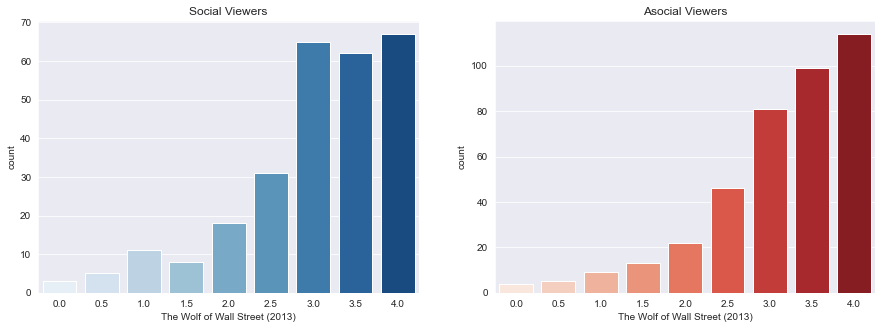

In [142]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=social_wolf, palette='Blues')
axes[0].set_title('Social Viewers')
sns.countplot(ax=axes[1], x=asocial_wolf, palette='Reds')
axes[1].set_title('Asocial Viewers')
plt.show()

##### Let's choose a significance test
* Z-test: We don't know the population parameters. <font color='red'>Not appropiate</font> <br>
* T-test: Sample means can't be interpreted meaningfully (psichologically, the distance from 4.5 and a 5 is different from the distance from 0 to 0.5). Additionally, it is not normally distributed <font color='red'>Not appropiate</font><br>
* U-test (Mann-Whitney): We do want to test for differences in medians to check which one is higher <font color='green'>Appropiate</font>  <br>
* KS-test: Not interested in comparing distributions <font color='red'>Incorrect</font> <br>
* $\chi^2$ test: Not interested in the general relationship between the variables <font color='red'>Incorrect</font>

$H_0$: Viewers who like to watch movies socially do not enjoy the Wolf of Wall Street movie more than viewers who prefer to eatch movies alone.<br>
$H_1$: Viewers who like to watch movies socially enjoy the Wolf of Wall Street movie more than viewers who prefer to eatch movies alone.

In [293]:
test7 = mannwhitneyu(social_wolf, asocial_wolf, alternative='greater') #Runs a Mann Whitney U-test
if test7.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test7.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test7.pvalue))

We fail to reject the Null Hypothesis (p-value = 0.9436657996253056)


CONCLUSION: Viewers who like to watch movies socially **do not enjoy** the Wolf of Wall Street movie more than viewers who prefer to eatch movies alone.

#### 8) What proportion of movies exhibit such a “social watching” effect?

To answer this question we must loop over all movies, divide it into two samples of social and asocial viewers and perform a KS-test (and Mannwhitney U-test) to check whether they are statistically different or not. During this loop, we must keep track of the number of movies whose ratings between social and asocial viewers are indeeed statistically different and output its proportion.

In [75]:
titles = movies.columns.tolist()
significant, significant2 = 0, 0
for title in titles:
    movies_ = df.iloc[:,[df.columns.get_loc(title),476]].dropna()
    movie_social = movies_[movies_['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0.0][title]
    movie_asocial = movies_[movies_['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1.0][title]
    test6 = kstest(movie_social, movie_asocial, alternative='two-sided')
    if test6.pvalue < 0.005:
        significant = significant + 1
    test6 = mannwhitneyu(movie_social, movie_asocial, alternative='two-sided')
    if test6.pvalue < 0.005:
        significant2 = significant2 + 1

print('The proportion of movies that exhibit a social watching effect is {}% (based on KS-test)'
      .format(100 * significant/len(titles)))   
print('The proportion of movies that exhibit a social watching effect is {}% (based on Mann Whitney U-test)'
      .format(100 * significant2/len(titles)))   

The proportion of movies that exhibit a social watching effect is 0.5% (based on KS-test)
The proportion of movies that exhibit a social watching effect is 2.5% (based on Mann Whitney U-test)


#### 9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

In [10]:
#Extracts the ratings for both Home Alone and Finding Nemo
home_nemo = movies[['Home Alone (1990)', 'Finding Nemo (2003)']].dropna()

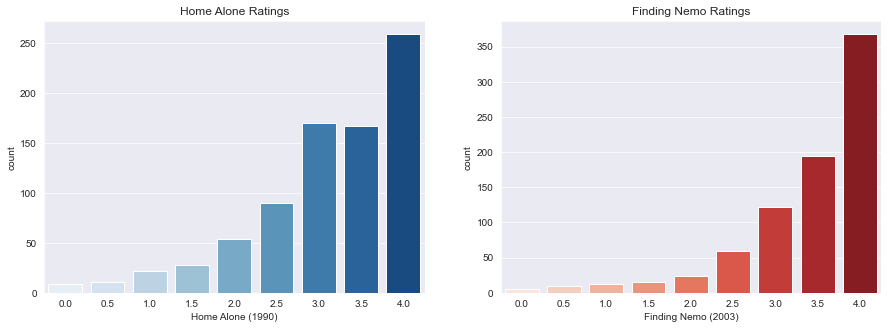

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=home_nemo['Home Alone (1990)'], palette='Blues')
axes[0].set_title('Home Alone Ratings')
sns.countplot(ax=axes[1], x=home_nemo['Finding Nemo (2003)'], palette='Reds')
axes[1].set_title('Finding Nemo Ratings')
plt.show()

##### Let's choose a significance test
* Z-test: We don't know the population parameters. <font color='red'>Not appropiate</font> <br>
* T-test: Sample means can't be interpreted meaningfully (psichologically, the distance from 4.5 and a 5 is different from the distance from 0 to 0.5). Additionally, it is not normally distributed <font color='red'>Not appropiate</font><br>
* U-test (Mann-Whitney): We could test for differences in medians even though if the result is that the medians are the same, we could not discard a difference in the underlying distribution <font color='blue'>Slightly Appropiate</font>  <br>
* KS-test: We are interested in comparing the underlying distributions <font color='green'>Appropiate</font> <br>
* $\chi^2$ test: We are interested in the general relationship between the variables and each category has enough samples to use this test but the sample sizes are not the same <font color='red'>Not appropiate</font>

$H_0$: The movie Home Alone does not have a different distribution to the movie Finding Nemo.<br>
$H_1$: The movie Home Alone has a different distribution compared to the movie Finding Nemo.

In [12]:
test9 = kstest(home_nemo['Home Alone (1990)'], home_nemo['Finding Nemo (2003)'], alternative='two-sided') #Runs a KS-test
if test9.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test9.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test9.pvalue))

We reject the Null Hypothesis (p-value = 2.2038507937682687e-10)


In [13]:
test9 = mannwhitneyu(home_nemo['Home Alone (1990)'], home_nemo['Finding Nemo (2003)'], alternative='two-sided') #Runs a KS-test
if test9.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test9.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test9.pvalue))

We reject the Null Hypothesis (p-value = 2.4436856207027405e-12)


CONCLUSION: The movie Home Alone has a **different distribution** compared to the movie Finding Nemo.

#### 10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [14]:
#Creates a dictionary whose keys are the franchises and values are dataframes with the rankings of each movie in the frachise
titles = list(movies.columns)
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
franch_dict = {}
for franchise in franchises:
    movies_ = [title for title in titles if franchise in title]
    franch_dict[franchise] = movies.iloc[:,df.columns.get_indexer(movies_)].dropna()

Loops over the movies in each franchise and performs a KS-test of each pair, checking if there is any combination of movies with a statistically significant difference of distrbutions. If that is the case, they are considered of inconsistent quality, if not they are considered of consistent quality.

In [16]:
for franchise in franch_dict:
    significant = 0
    for title1 in franch_dict[franchise]:
        for title2 in franch_dict[franchise]:
            if title1 == title2: 
                continue
            else: 
                test10 = kstest(franch_dict[franchise][title1], franch_dict[franchise][title2], alternative='two-sided')
                if test10.pvalue < 0.005:
                    significant = significant + 1
        
    if significant == 0: print('{} is of consistent quality!'.format(franchise))
    else: print('{} is of inconsistent quality because {} pairs movies are significantly different from each other.'
                .format(franchise, int(significant/2)))

Star Wars is of inconsistent quality because 8 pairs movies are significantly different from each other.
Harry Potter is of consistent quality!
The Matrix is of inconsistent quality because 2 pairs movies are significantly different from each other.
Indiana Jones is of inconsistent quality because 4 pairs movies are significantly different from each other.
Jurassic Park is of inconsistent quality because 3 pairs movies are significantly different from each other.
Pirates of the Caribbean is of consistent quality!
Toy Story is of inconsistent quality because 1 pairs movies are significantly different from each other.
Batman is of inconsistent quality because 3 pairs movies are significantly different from each other.


#### Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

In [5]:
#Gets the rankings of judgy and other viewers
judgy_users = df[(df['Tends to find fault with others'] == 5) | (df['Tends to find fault with others'] == 4)].iloc[:,0:400]
other_users = df[(df['Tends to find fault with others'] == 2) | (df['Tends to find fault with others'] == 1)].iloc[:,0:400]

# Convert the dataframes into arrays of all rankings
judgy_ratings = np.array(judgy_users.iloc[0:358,:]).reshape(-1)
other_ratings = np.array(other_users).reshape(-1)

#Removes missing values
judgy_ratings = judgy_ratings[~np.isnan(judgy_ratings)]
other_ratings = other_ratings[~np.isnan(other_ratings)]

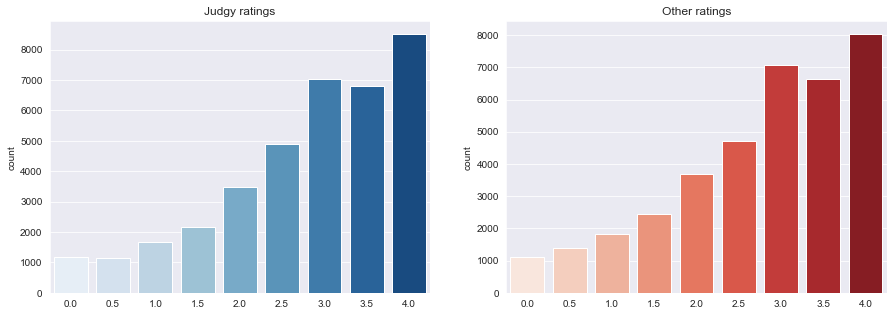

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=judgy_ratings, palette='Blues')
axes[0].set_title('Judgy ratings')
sns.countplot(ax=axes[1], x=other_ratings, palette='Reds')
axes[1].set_title('Other ratings')
plt.show()

In [12]:
test11 = mannwhitneyu(judgy_ratings, other_ratings, alternative='greater') #Runs a Mann Whitney U-test
if test11.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test11.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test11.pvalue))

We reject the Null Hypothesis (p-value = 5.542824007265551e-92)


In [13]:
#Gets the rankings of judgy and other viewers
kind_users = df[(df['Is considerate and kind to almost everyone'] == 5) | (df['Is considerate and kind to almost everyone'] == 5)].iloc[:,0:400]
other_users = df[(df['Is considerate and kind to almost everyone'] == 1) | (df['Is considerate and kind to almost everyone'] == 2) | (df['Is considerate and kind to almost everyone'] == 3)].iloc[:,0:400]

# Convert the dataframes into arrays of all rankings
kind_ratings = np.array(kind_users).reshape(-1)
other_ratings = np.array(other_users).reshape(-1)

#Removes missing values
kind_ratings = kind_ratings[~np.isnan(kind_ratings)]
other_ratings = other_ratings[~np.isnan(other_ratings)]

In [19]:
print(len(kind_ratings), len(other_ratings))

30691 25746


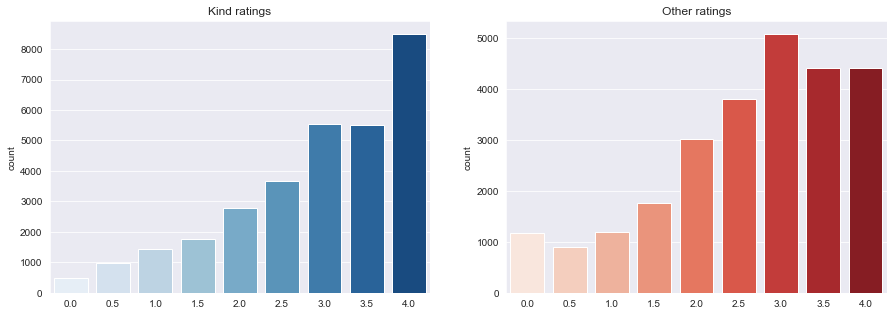

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0], x=kind_ratings, palette='Blues')
axes[0].set_title('Kind ratings')
sns.countplot(ax=axes[1], x=other_ratings, palette='Reds')
axes[1].set_title('Other ratings')
plt.show()

$H_0$: Viewers considered kind to almost everyone do not give higher ratings than other viewers<br>
$H_1$: Viewers considered kind to almost everyone give higher ratings than other viewers

In [23]:
test11 = mannwhitneyu(kind_ratings, other_ratings, alternative='greater') #Runs a Mann Whitney U-test
if test11.pvalue < 0.005:
    print('We reject the Null Hypothesis (p-value = {})'.format(test11.pvalue))
else:
    print('We fail to reject the Null Hypothesis (p-value = {})'.format(test11.pvalue))

We reject the Null Hypothesis (p-value = 1.8160709992391143e-205)


<font color='red'>DELETE BELOW</font>

'Tends to find fault with others', (ranks lower)<br>
'Can be somewhat careless'  (less .5s)<br>
'Tends to be lazy' (less .5s)<br>
'Is considerate and kind to almost everyone', (Higher ranking just to be nice)<br>
'Does a thorough job' (More .5s)